In [1]:
import math
import pandas as pd
import quandl, datetime, pickle
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
from sklearn import preprocessing, model_selection, svm
from sklearn.linear_model import LinearRegression
import time

In [2]:
style.use('ggplot')

In [3]:
df = quandl.get('WIKI/GOOGL')
df

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2004-08-19,100.010,104.06,95.96,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,101.010,109.08,100.50,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,110.760,113.48,109.05,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,111.240,111.60,103.57,104.870,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,104.760,108.00,103.88,106.000,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0
2004-08-26,104.950,107.95,104.66,107.910,7094800.0,0.0,1.0,52.637487,54.142132,52.492038,54.122070,7094800.0
2004-08-27,108.100,108.62,105.69,106.150,6211700.0,0.0,1.0,54.217364,54.478169,53.008633,53.239345,6211700.0
2004-08-30,105.280,105.49,102.01,102.010,5196700.0,0.0,1.0,52.802998,52.908323,51.162935,51.162935,5196700.0
2004-08-31,102.320,103.71,102.16,102.370,4917800.0,0.0,1.0,51.318415,52.015567,51.238167,51.343492,4917800.0


In [4]:
df = df[['Adj. Open', 'Adj. High','Adj. Low','Adj. Close','Adj. Volume']]
df

,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,
2004-08-19,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,52.542193,54.167209,52.100830,53.164113,9188600.0
2004-08-26,52.637487,54.142132,52.492038,54.122070,7094800.0
2004-08-27,54.217364,54.478169,53.008633,53.239345,6211700.0
2004-08-30,52.802998,52.908323,51.162935,51.162935,5196700.0
2004-08-31,51.318415,52.015567,51.238167,51.343492,4917800.0


In [5]:
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Close']) / df['Adj. Close'] * 100.0
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0

df = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]
df

/home/rohan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/rohan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Adj. Close,HL_PCT,PCT_change,Adj. Volume
Date,,,,
2004-08-19,50.322842,3.712563,0.324968,44659000.0
2004-08-20,54.322689,0.710922,7.227007,22834300.0
2004-08-23,54.869377,3.729433,-1.227880,18256100.0
2004-08-24,52.597363,6.417469,-5.726357,15247300.0
2004-08-25,53.164113,1.886792,1.183658,9188600.0
2004-08-26,54.122070,0.037068,2.820391,7094800.0
2004-08-27,53.239345,2.326896,-1.803885,6211700.0
2004-08-30,51.162935,3.411430,-3.106003,5196700.0
2004-08-31,51.343492,1.308977,0.048866,4917800.0


In [6]:
forecast_col = 'Adj. Close'

In [8]:
#filling nan values
df.fillna(-99999, inplace=True)
df

/home/rohan/.local/lib/python3.6/site-packages/pandas/core/frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


,Adj. Close,HL_PCT,PCT_change,Adj. Volume
Date,,,,
2004-08-19,50.322842,3.712563,0.324968,44659000.0
2004-08-20,54.322689,0.710922,7.227007,22834300.0
2004-08-23,54.869377,3.729433,-1.227880,18256100.0
2004-08-24,52.597363,6.417469,-5.726357,15247300.0
2004-08-25,53.164113,1.886792,1.183658,9188600.0
2004-08-26,54.122070,0.037068,2.820391,7094800.0
2004-08-27,53.239345,2.326896,-1.803885,6211700.0
2004-08-30,51.162935,3.411430,-3.106003,5196700.0
2004-08-31,51.343492,1.308977,0.048866,4917800.0


In [11]:
#output of col
forecast_out = int(math.ceil(0.01*len(df)))
print(len(df))
print(forecast_out)
df['label'] = df[forecast_col].shift(-forecast_out)
df

3424
35


/home/rohan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label
Date,,,,,
2004-08-19,50.322842,3.712563,0.324968,44659000.0,69.078238
2004-08-20,54.322689,0.710922,7.227007,22834300.0,67.839414
2004-08-23,54.869377,3.729433,-1.227880,18256100.0,68.912727
2004-08-24,52.597363,6.417469,-5.726357,15247300.0,70.668146
2004-08-25,53.164113,1.886792,1.183658,9188600.0,71.219849
2004-08-26,54.122070,0.037068,2.820391,7094800.0,72.278116
2004-08-27,53.239345,2.326896,-1.803885,6211700.0,74.810934
2004-08-30,51.162935,3.411430,-3.106003,5196700.0,74.199045
2004-08-31,51.343492,1.308977,0.048866,4917800.0,70.462511


In [12]:
X = np.array(df.drop(['label'], 1))
X = preprocessing.scale(X)
X = X[:-forecast_out]
X_lately = X[-forecast_out:]
df.dropna(inplace=True)
X

/home/rohan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


array([[-1.39187095,  2.33516806,  0.23254018,  4.46712802],
       [-1.37635178, -0.31135438,  4.81828847,  1.8207495 ],
       [-1.37423066,  2.35004252, -0.79917922,  1.26561472],
       ...,
       [ 2.99737935, -0.50090092,  0.33301614, -0.61156746],
       [ 2.7553098 ,  0.01505419, -0.46778619, -0.24489949],
       [ 2.55960556,  2.87565464, -1.90605746, -0.49425191]])

In [13]:
Y = np.array(df['label'])
Y

array([  69.0782379 ,   67.83941377,   68.91272699, ..., 1026.55      ,
       1054.09      , 1006.94      ])

In [14]:
X_train,X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.2)

In [15]:
clf = LinearRegression(n_jobs=1)
clf.fit(X_train, Y_train)

#saving classifier
with open('linearregression.pickle', 'wb') as f:
	pickle.dump(clf, f)

In [16]:
pickle_in = open('linearregression.pickle', 'rb')
clf = pickle.load(pickle_in)

In [18]:
accuracy = clf.score(X_test, Y_test)
accuracy

0.9763672459352561

In [21]:
forecast_set = clf.predict(X_lately)
forecast_set

array([1075.29520785, 1089.92956004, 1103.88907351, 1098.25575118,
       1091.70570668, 1089.15403043, 1087.63390338, 1084.56537063,
       1078.36392272, 1074.02420824, 1071.78506101, 1091.79655574,
       1110.07251921, 1114.07885125, 1129.09249205, 1133.02155345,
       1131.44352582, 1129.1694745 , 1130.85826025, 1149.68598255,
       1148.2349045 , 1158.41411698, 1154.88509681, 1162.81898668,
       1183.43614535, 1195.38602696, 1189.33765882, 1201.51411334,
       1206.98022891, 1205.12259462, 1195.92473926, 1201.39468709,
       1200.19569272, 1135.63285339, 1082.45406138])

In [20]:
df['Forecast'] = np.nan

last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

/home/rohan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [22]:
for i in forecast_set:
	next_date = datetime.datetime.fromtimestamp(next_unix)
	next_unix += one_day
	df.loc[next_date] = [np.nan for _ in range(len(df.columns) - 1)] + [i]
	

/home/rohan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


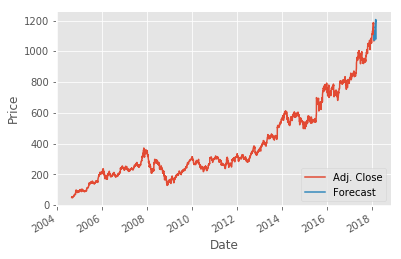

In [23]:
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

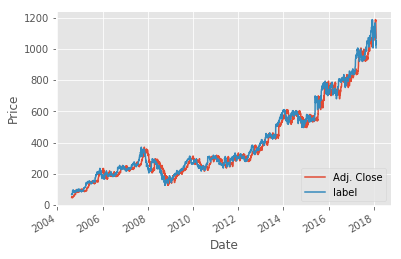

In [24]:
df['Adj. Close'].plot()
df['label'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()